In [1]:
from Qommunity.samplers.hierarchical.advantage_sampler import AdvantageSampler
from Qommunity.samplers.hierarchical.gurobi_sampler import GurobiSampler
from Qommunity.searchers.hierarchical_community_searcher import (
    HierarchicalCommunitySearcher,
)

from dendro import Dendrogram

In [2]:
import networkx as nx

# G = nx.powerlaw_cluster_graph(n=170, m=1, p=0.3)
G = nx.karate_club_graph()
searcher = HierarchicalCommunitySearcher(GurobiSampler(G))

res = searcher.hierarchical_community_search(
    return_modularities=True, division_tree=True
)
communities, division_tree, division_modularities = res

dendro = Dendrogram(G, communities, division_modularities, division_tree)

In [3]:
nx.community.modularity(G, communities)

0.44490358126721763

In [4]:
division_modularities

[0.0, 0.40362811791383213, 0.44490358126721763]

## Full dendrogram - with leafs

#### Plot modularity increase on Y axis

The figsize is adjusted automatically (autoscaling).

> ⚠️ **Warning:** Autoscaling figsize under construction...

Autoscaling is not perfect for now:

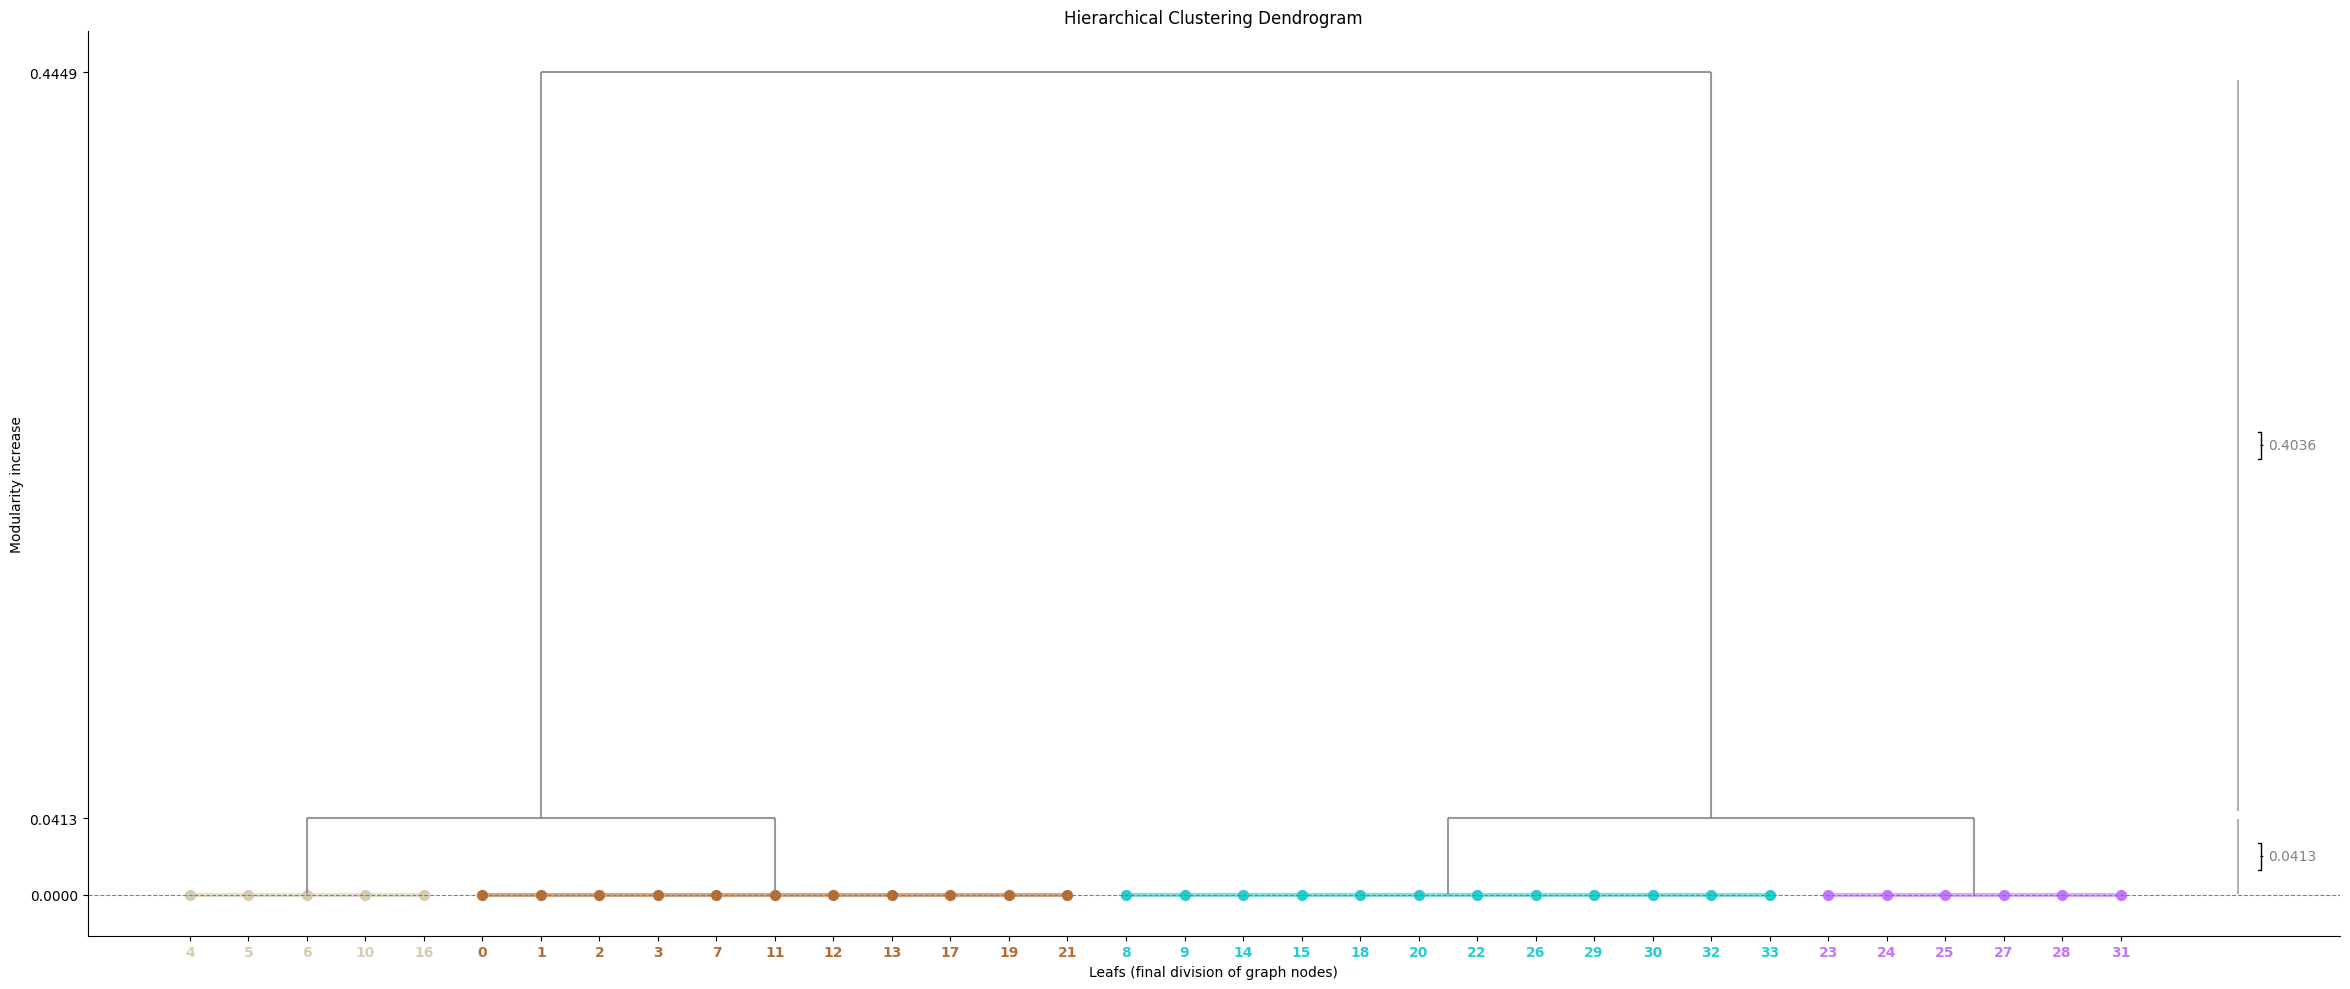

In [5]:
dendro.draw(display_leafs=True, yaxis_abs_log=False)

##### Plot abs of natural logarithm of modularity increase on Y axis:

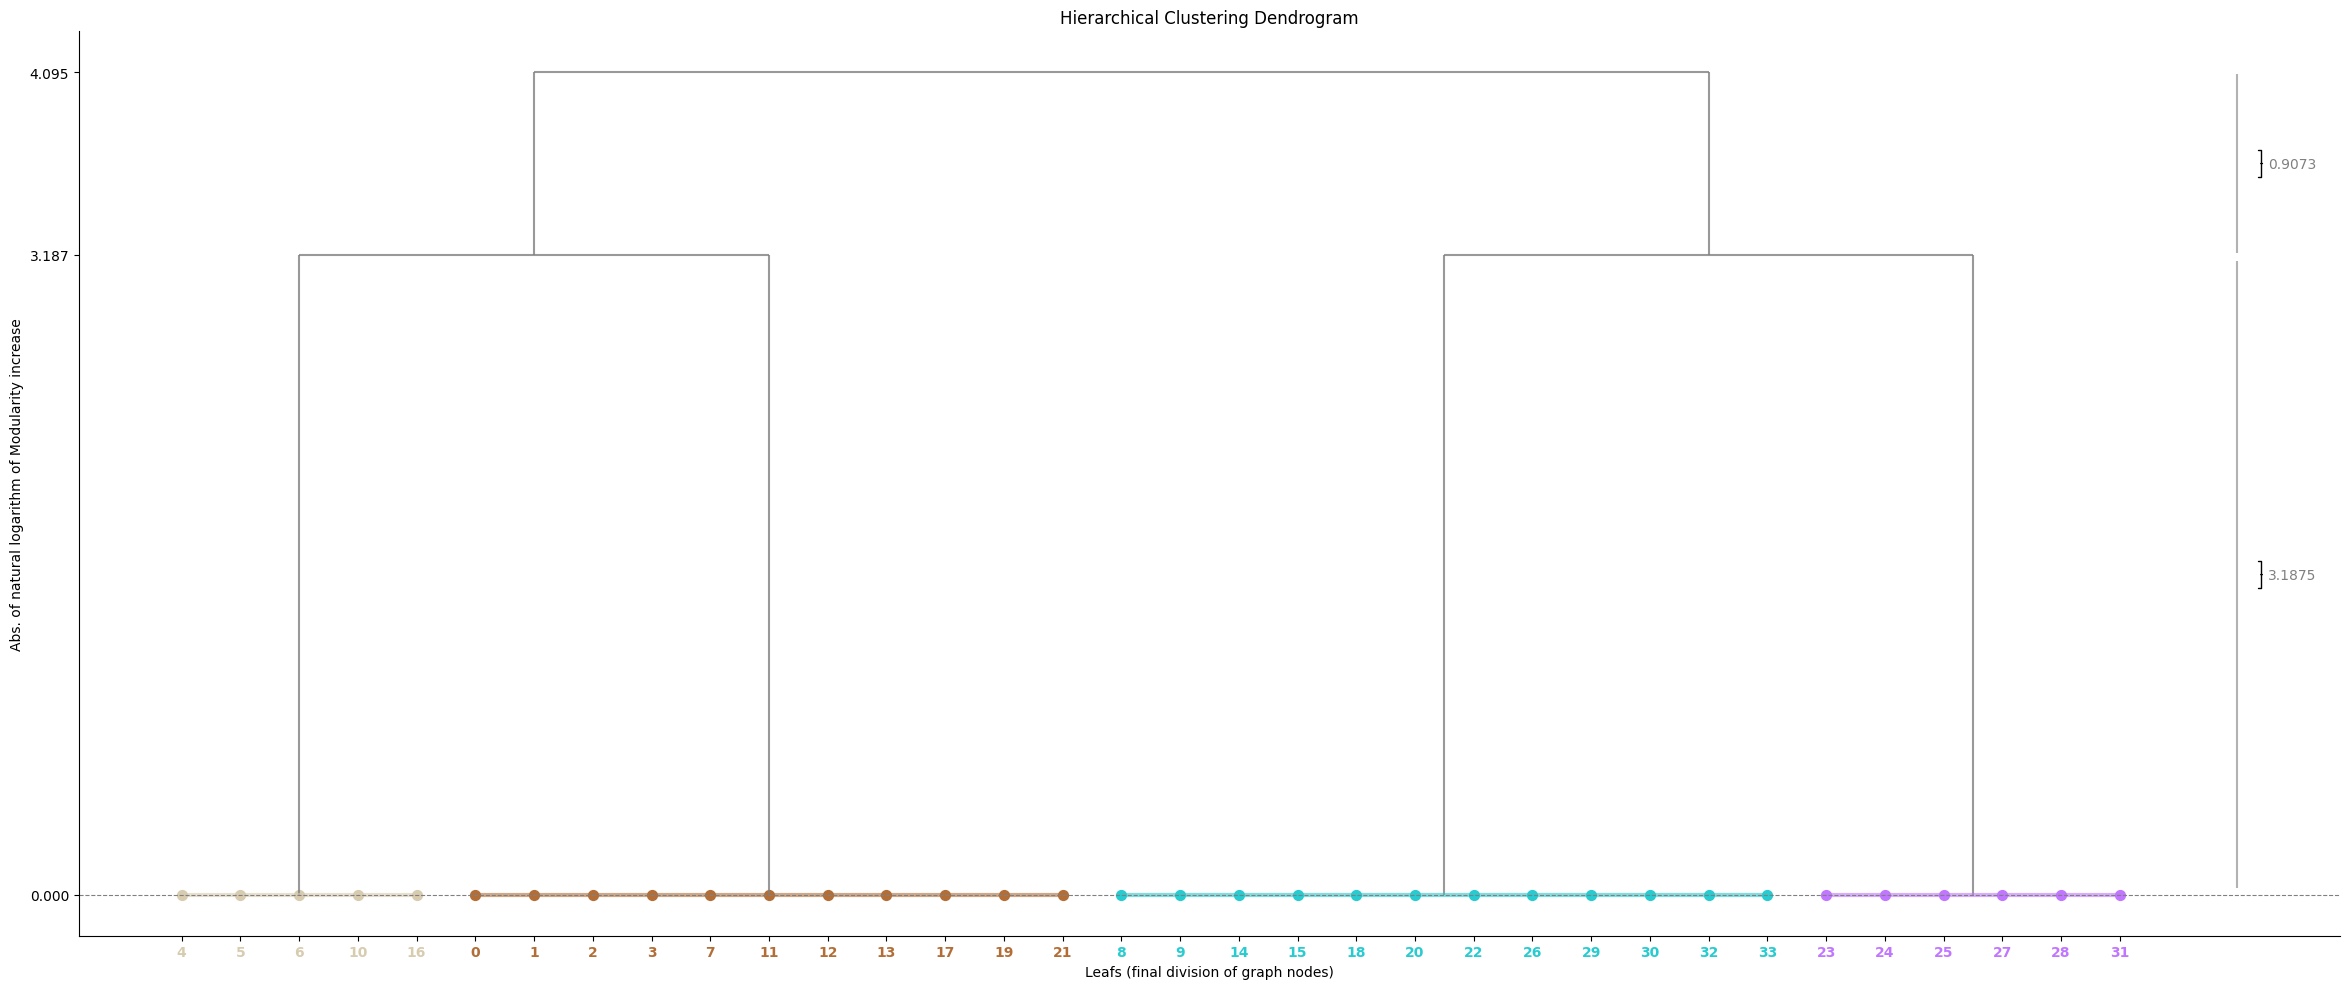

In [11]:
dendro.draw(display_leafs=True, yaxis_abs_log=True)

> ⚠️ **Warning:** Construction site patch:

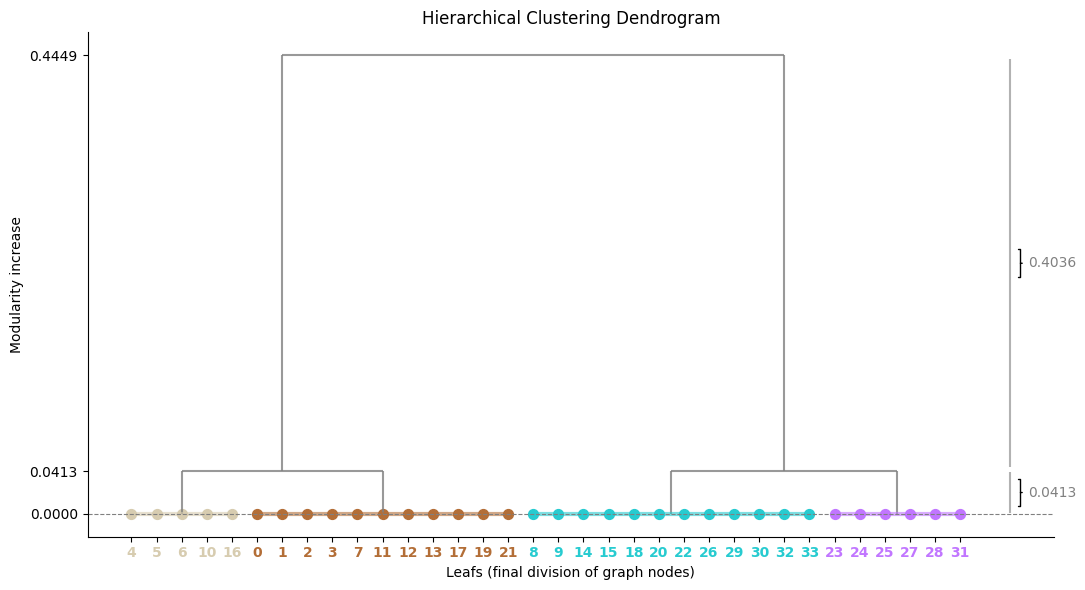

In [7]:
import matplotlib.pyplot as plt


# adjust figsize manually
figsize = figsize=(11, 6)
fig, ax = plt.subplots(figsize=figsize)
# pass ax and fig to dendrogram
dendro.draw(display_leafs=True, yaxis_abs_log=False, ax=ax, fig=fig)

Unfortunately, the same ax and fig cannot be reused:

In [8]:
dendro.draw(display_leafs=True, yaxis_abs_log=True, ax=ax, fig=fig)

<Figure size 640x480 with 0 Axes>

A new instance must be created and passed:

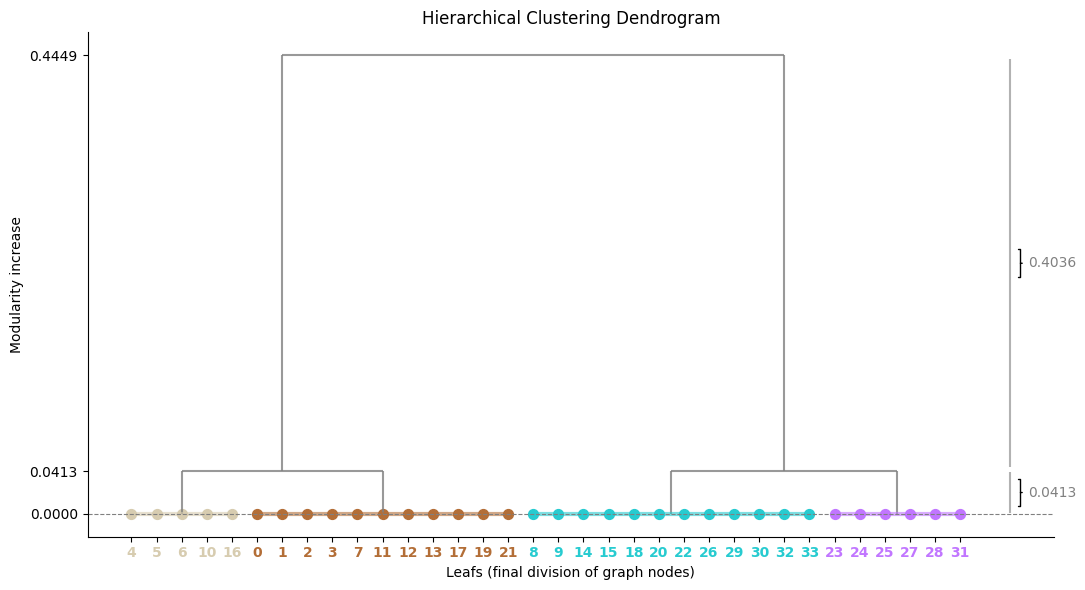

In [9]:
fig, ax = plt.subplots(figsize=figsize)
dendro.draw(display_leafs=True, yaxis_abs_log=False, ax=ax, fig=fig)

To bypass this, if you want to specify your own plot figure size, pass the `figsize` arg explicitly:

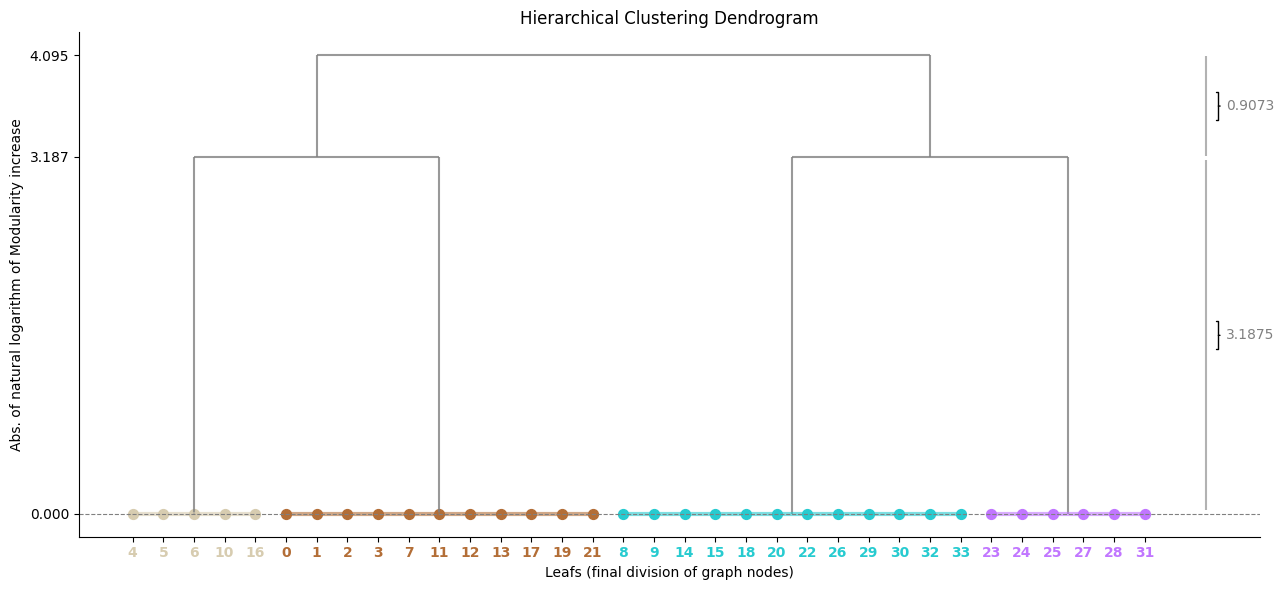

In [18]:
figsize_determined_manually_by_a_couple_of_trials_and_errors = (13, 6)
dendro.draw(display_leafs=True, yaxis_abs_log=True, figsize=figsize_determined_manually_by_a_couple_of_trials_and_errors)

You may save some space by rotating xlabels:

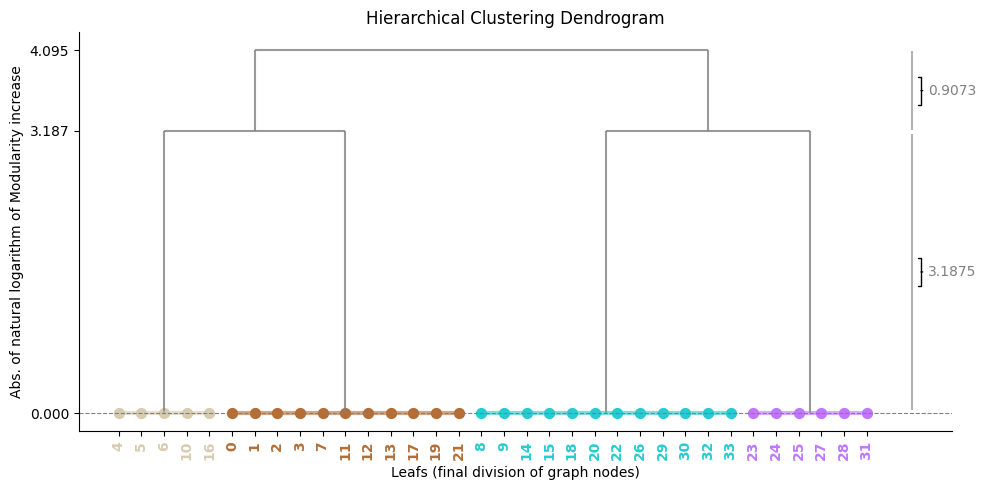

In [36]:
figsize = (10, 5)
title = "Dendrogram with figsize accustomed"
dendro.draw(display_leafs=True, yaxis_abs_log=True, figsize=figsize, xlabel_rotation=90)

##### Customize labels - apply mapping
To make this easy, the user shall provide a mapping between existing node names and the labels they wish to put on on the plot.

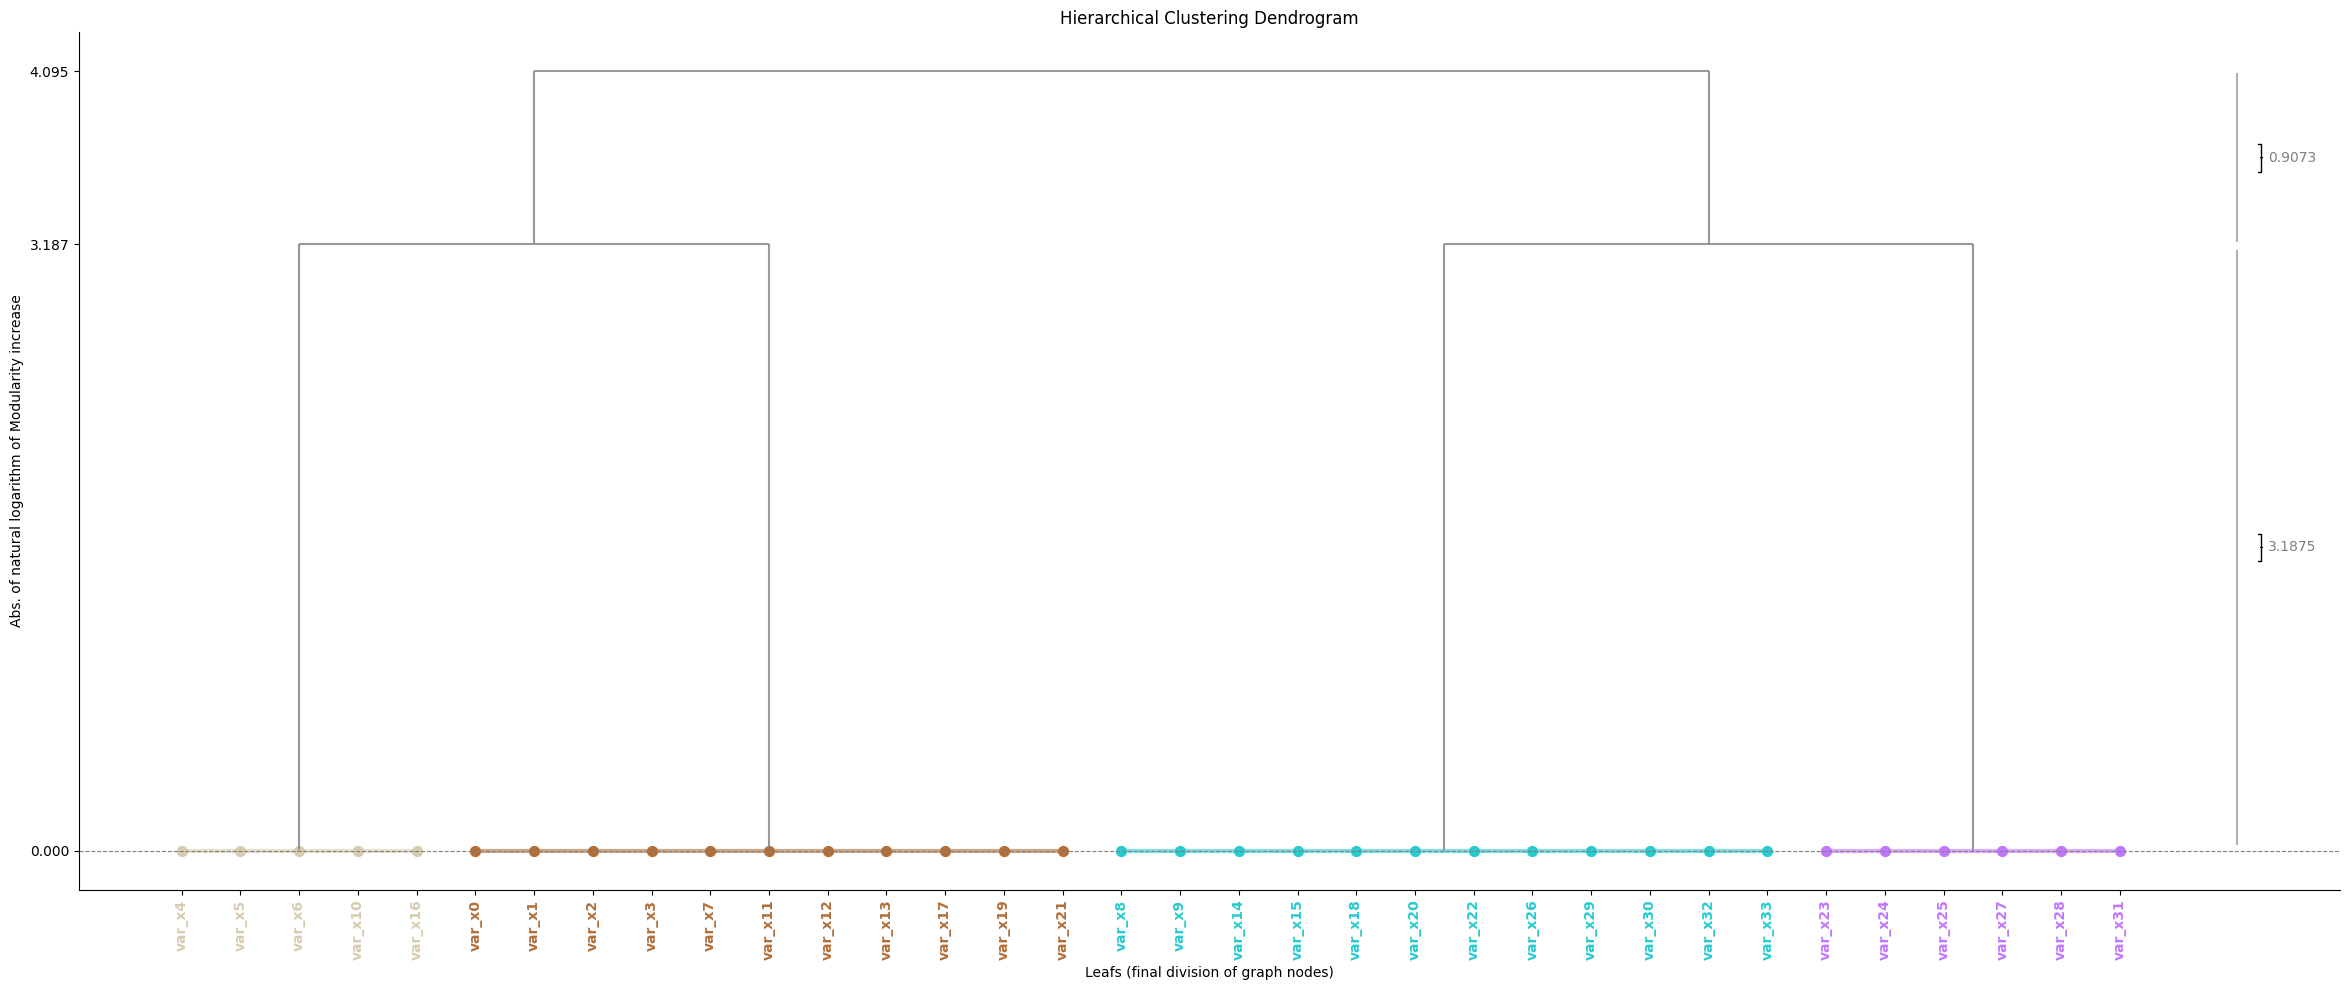

In [33]:
my_customised_node_label = lambda node: "var_x" + str(node)
node_labels_mapping = {node: my_customised_node_label(node) for node in G.nodes()}

dendro.draw(display_leafs=True, yaxis_abs_log=True, node_labels_mapping=node_labels_mapping, xlabel_rotation=90)

## Dendrogram - leafs hidden
For readability reasons - recommended for big graphs (> 100 nodes).

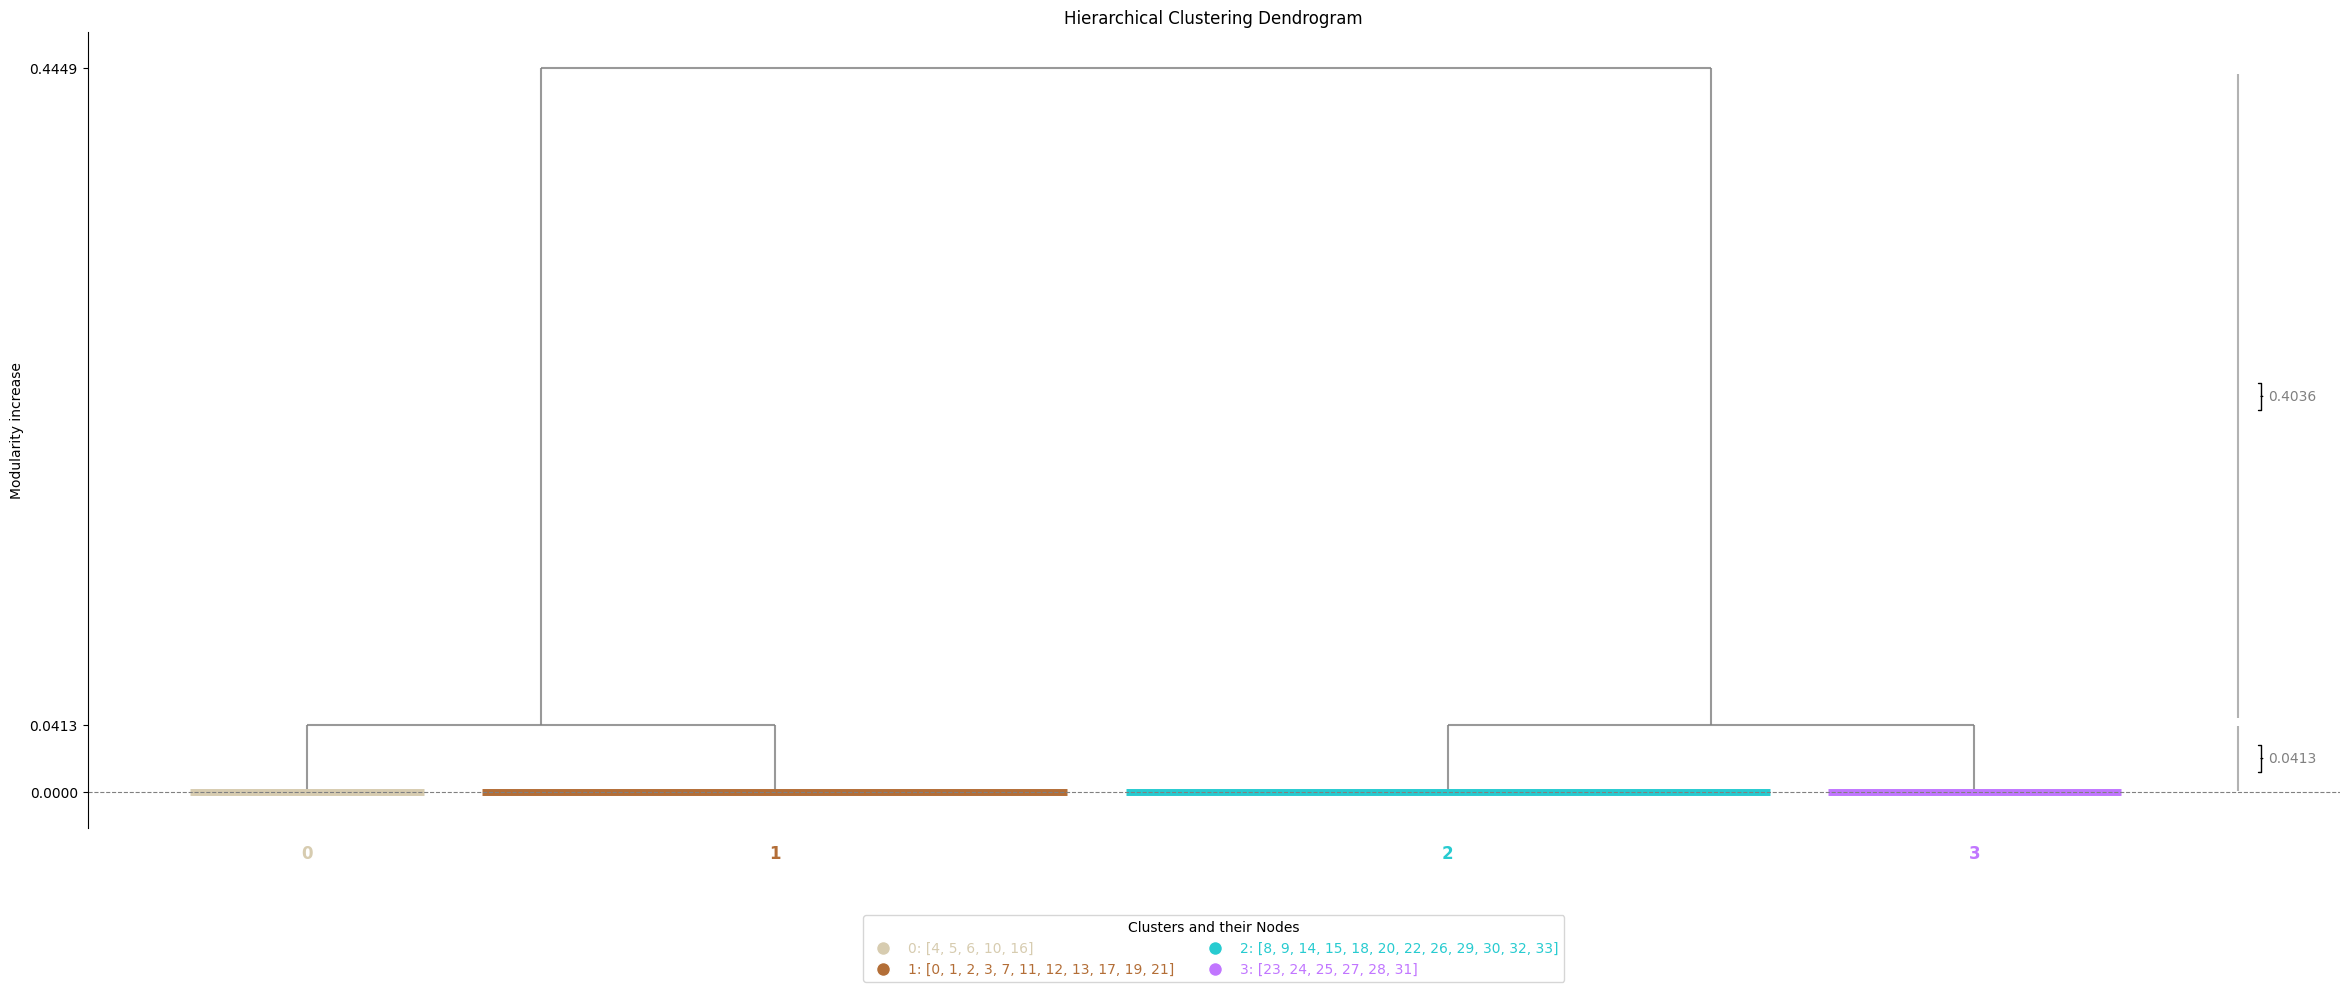

In [37]:
dendro.draw(display_leafs=False, yaxis_abs_log=False, with_labels=True)

##### Apply customized communities labels

In [38]:
communities_no = len(communities)
communities_no

4

In [39]:
communities

[[4, 5, 6, 10, 16],
 [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21],
 [8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33],
 [23, 24, 25, 27, 28, 31]]

To make it easy, provide the names of communities in the order they appear in `communities`, equivalent to the order they appear in on dendrograms above.

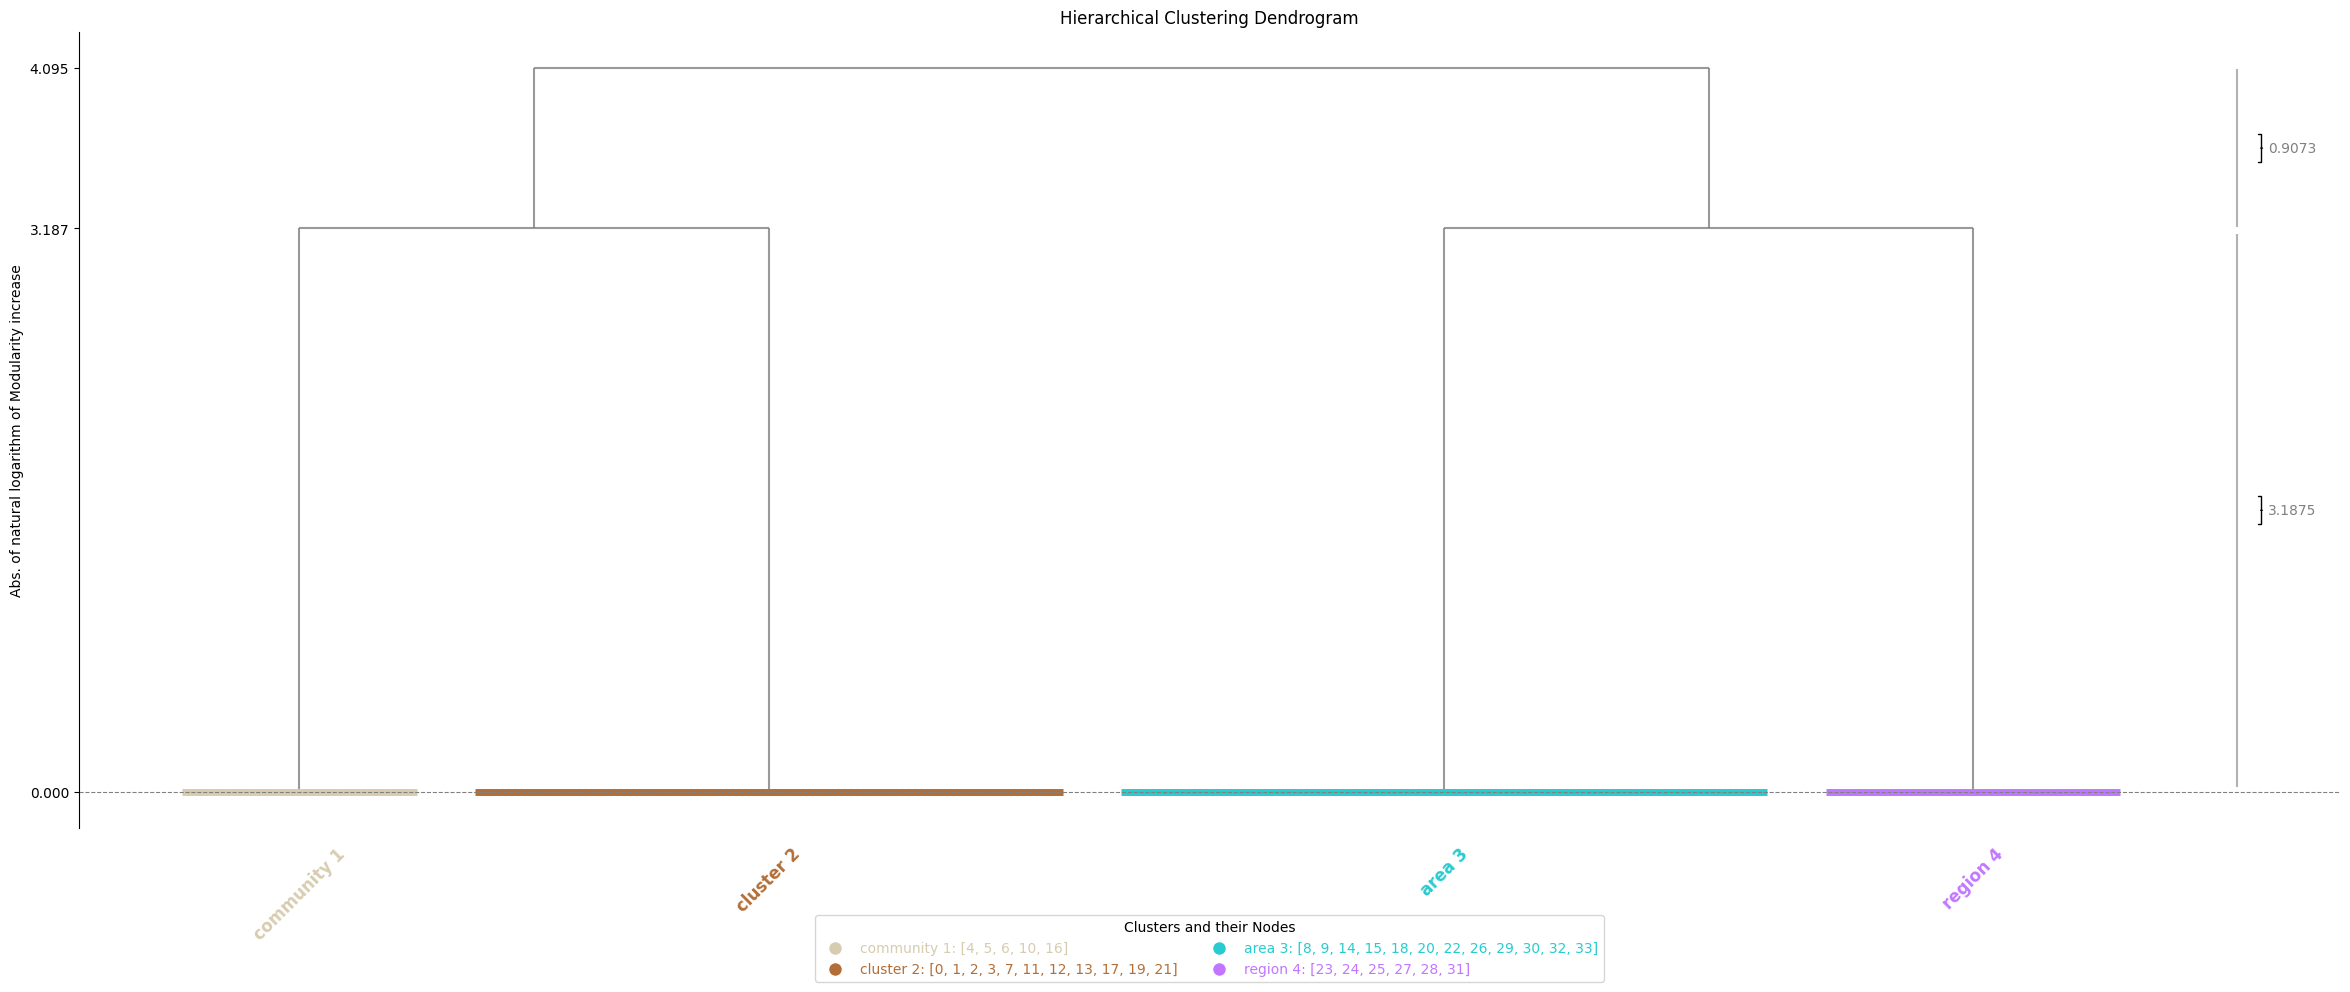

In [40]:
communities_labels = ["community 1", "cluster 2", "area 3", "region 4"]

dendro.draw(display_leafs=False, yaxis_abs_log=True, communities_labels=communities_labels, xlabel_rotation=45)

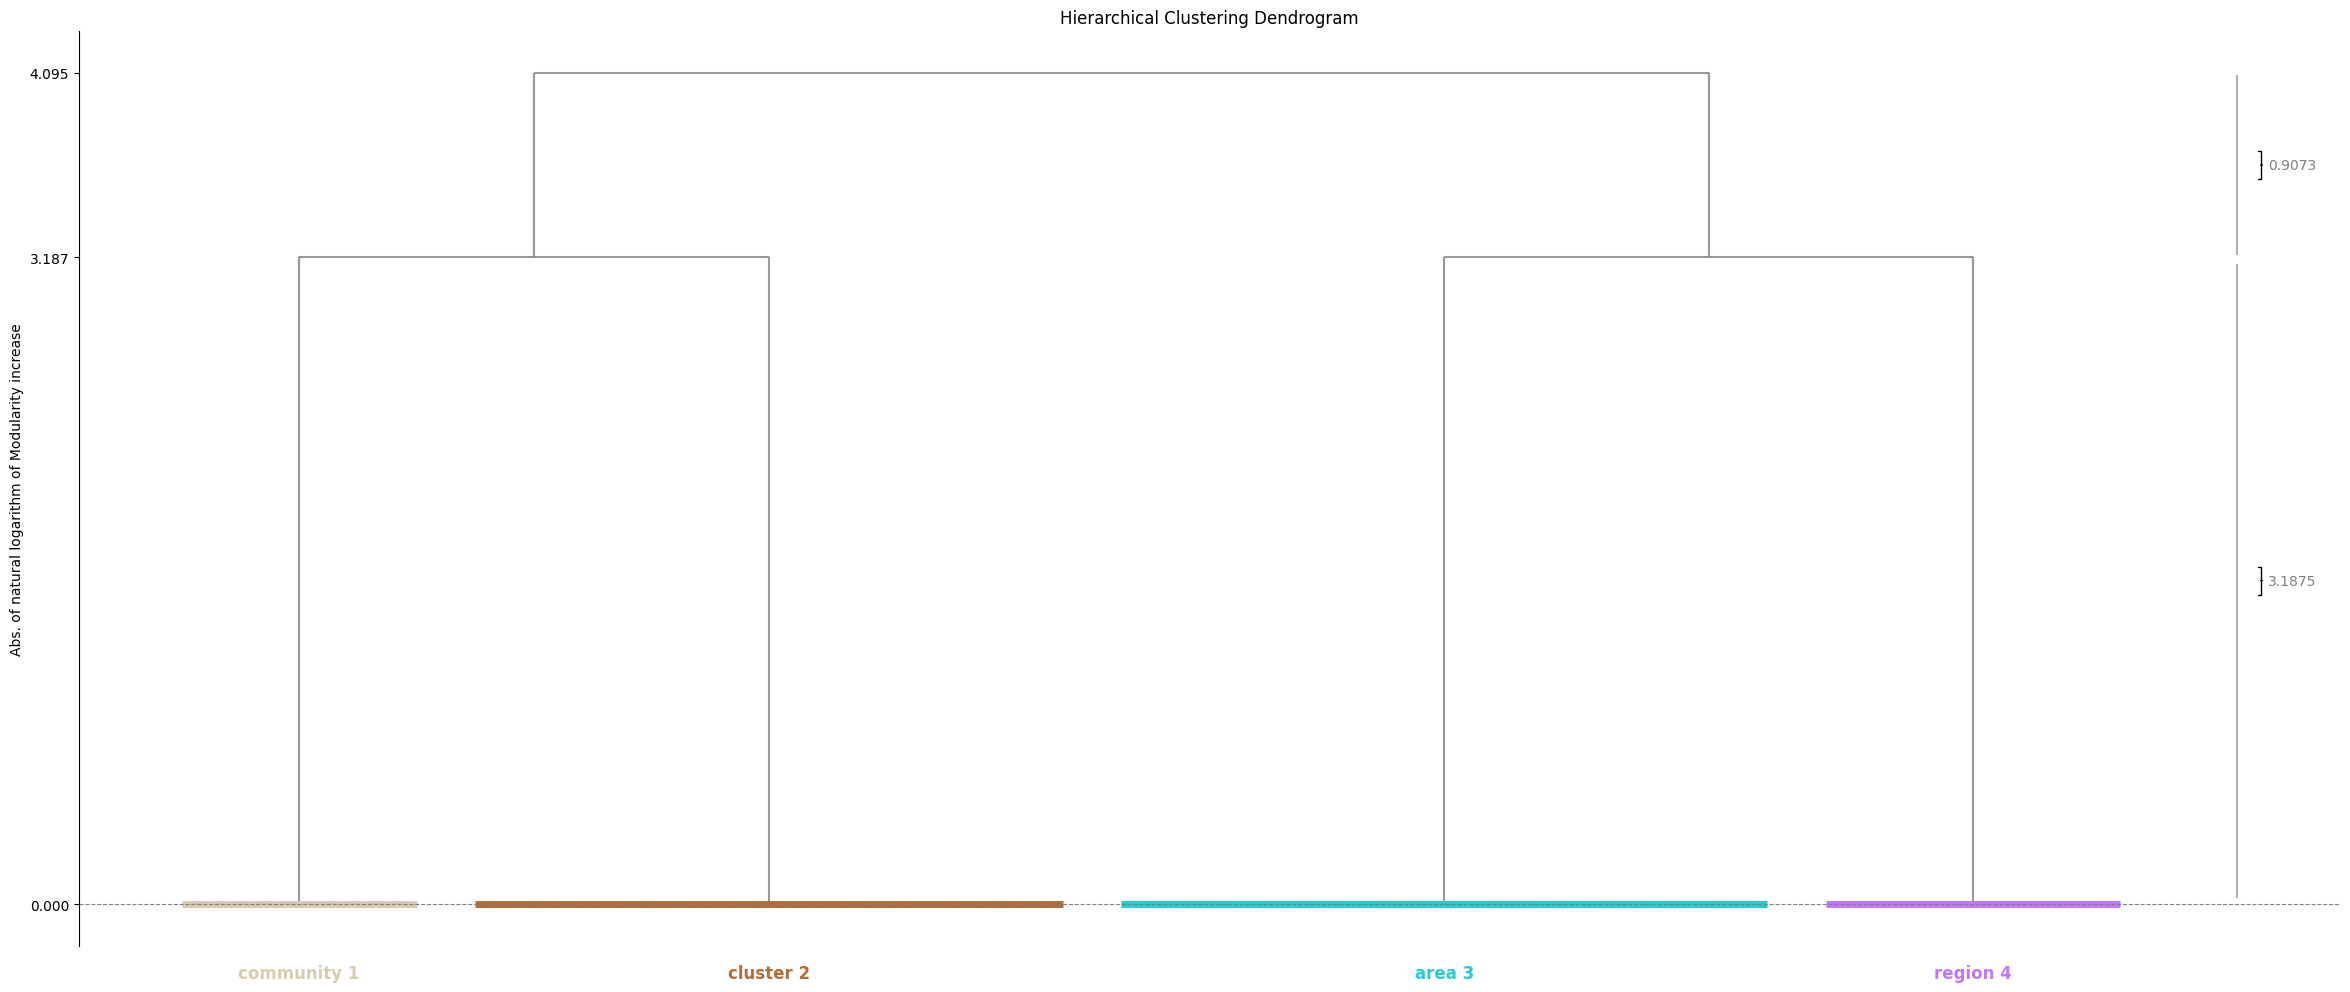

In [41]:
# Hide legend: with_clusters_legend=False
dendro.draw(display_leafs=False, yaxis_abs_log=True, communities_labels=communities_labels, with_communities_legend=False)

### Basic customisation options
- `title`
- `xlabel`
- `ylabel`

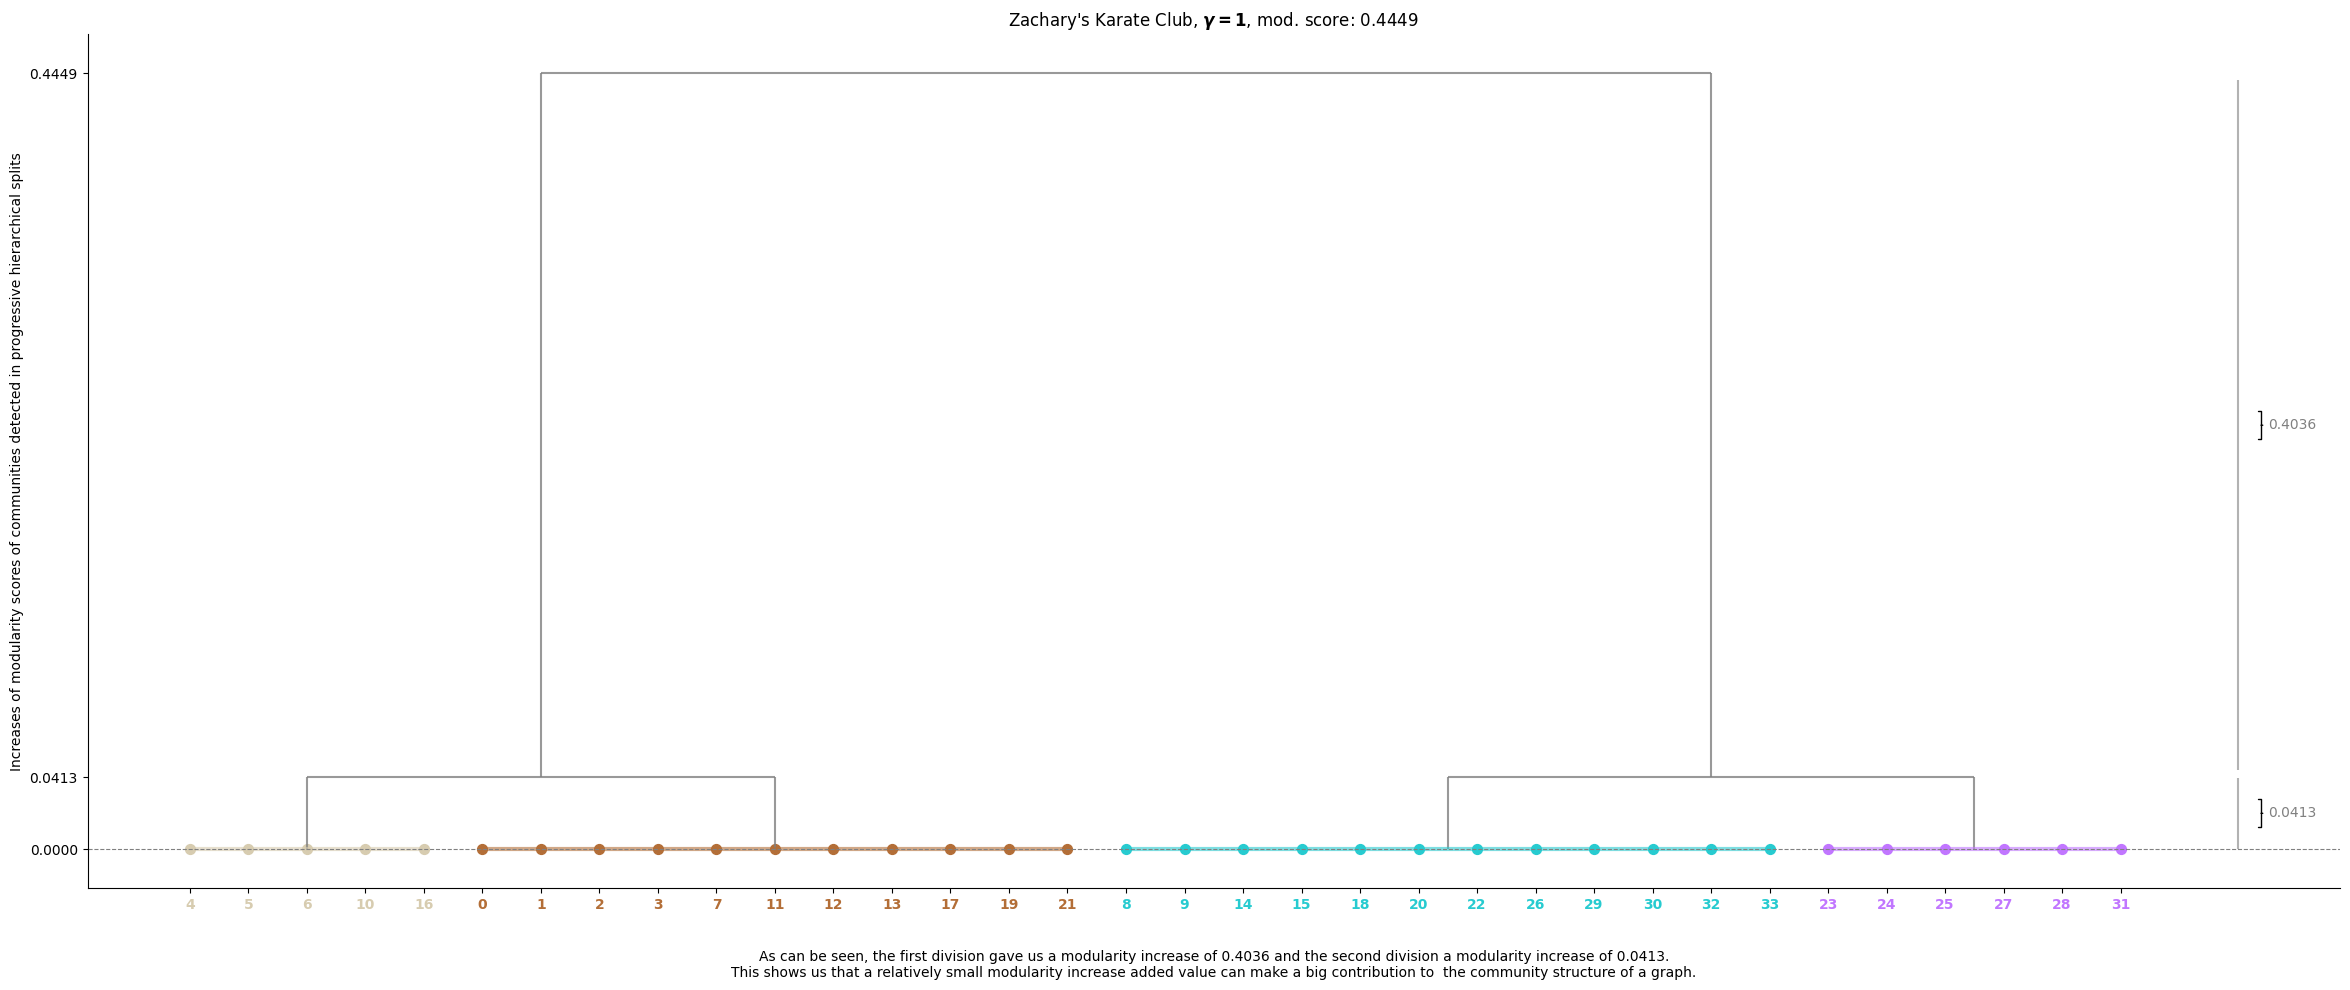

In [43]:
bold_gamma = r"$\boldsymbol{\gamma=1}$"
customised_title = rf"{G.name}, {bold_gamma}, mod. score: {nx.community.modularity(G, communities):.4f}"

xlabel = "\n\nAs can be seen, the first division gave us a modularity increase of 0.4036" \
    " and the second division a modularity increase of 0.0413.\n" \
    "This shows us that a relatively small modularity increase added value can make a big contribution to " \
    " the community structure of a graph."
ylabel = "Increases of modularity scores of communities detected in progressive hierarchical splits"

dendro.draw(display_leafs=True, yaxis_abs_log=False, title=customised_title, xlabel=xlabel, ylabel=ylabel)

### Save results

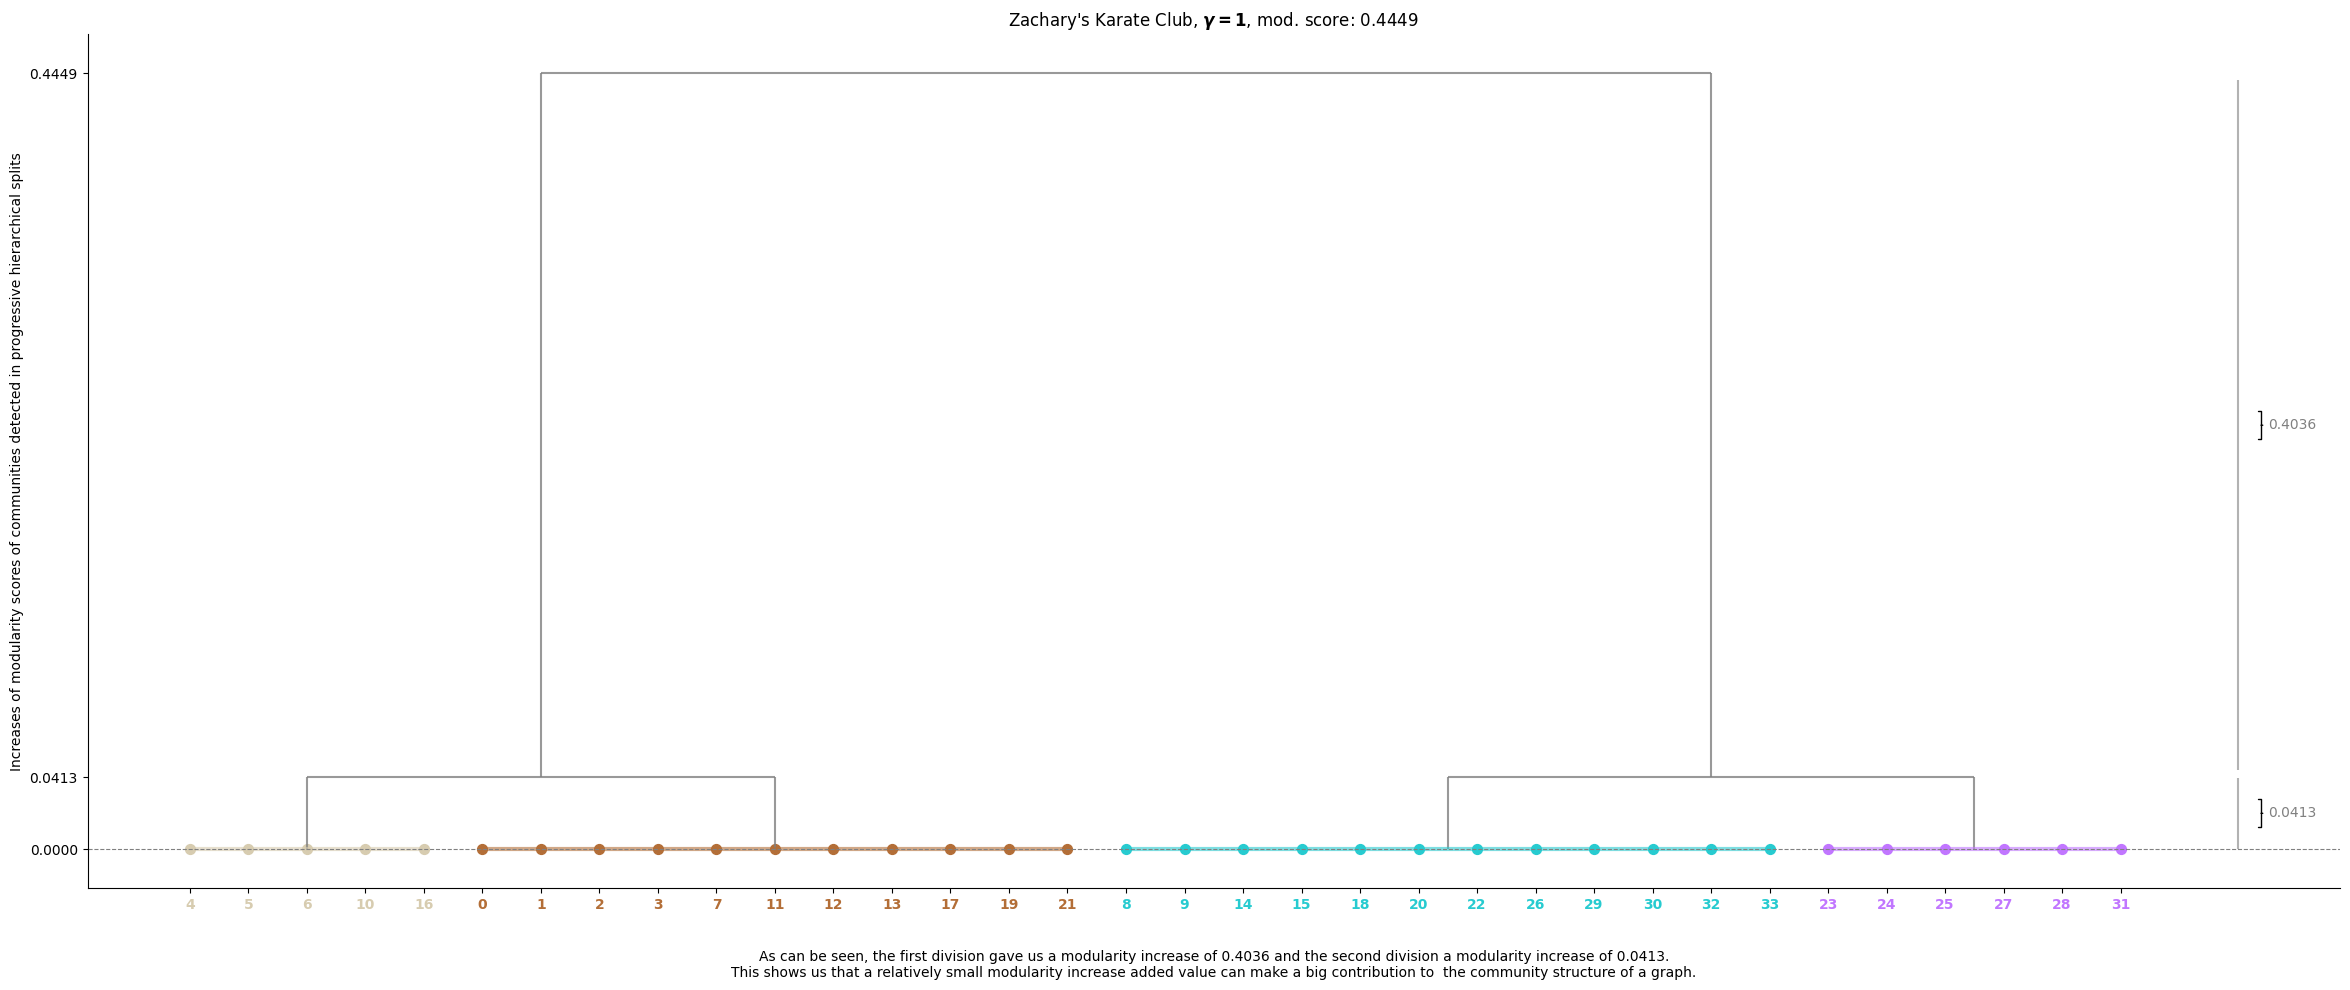

In [44]:
import os


os.makedirs(os.path.dirname("output/"), exist_ok=True)
fig_saving_path = f"output/karate_gurobi_res_1_mod_score_{nx.community.modularity(G, communities):.4f}.png"

dendro.draw(display_leafs=True, yaxis_abs_log=False, title=customised_title, xlabel=xlabel, ylabel=ylabel, fig_saving_path=fig_saving_path)

For big data serialization purposes (> 100 plots to save), it is recommended to run the draw method with show_plot=False to avoid overflow of matplotlib context manager.

However, if the data is small (e.g. 20 plots to save), we're probably good to go.

In [45]:
from iterative_searcher import IterativeSearcher


it_gurobi = IterativeSearcher(GurobiSampler(G))
gurobi_sampleset = it_gurobi.run_with_sampleset_info(num_runs=20, save_results=False)

gur_communities = gurobi_sampleset.communities
gur_division_modularities = gurobi_sampleset.division_modularities
gur_division_trees = gurobi_sampleset.division_tree

100%|██████████| 20/20 [00:03<00:00,  5.94it/s]


In [46]:
os.makedirs(os.path.dirname("output/karate/gurobi/"), exist_ok=True)
# Seed for color generator
color_seed = 1256

for i, (comms, div_tree, div_mods) in enumerate(zip(gur_communities, gur_division_trees, gur_division_modularities)):
    dendro_i = Dendrogram(G, communities=comms, division_modularities=div_mods, division_tree=div_tree)
    mod_score = nx.community.modularity(G, comms)
    fig_saving_path = f"output/karate/gurobi/it_{i}_mod_score_{mod_score:.4f}.jpg"
    # show_plot=False
    dendro_i.draw(fig_saving_path=fig_saving_path, show_plot=False, title=customised_title, xlabel=xlabel, ylabel=ylabel, color_seed=color_seed)